# Ejercicio 2: Sistemas cristalinos 💍
## Contexto:

En el área de cristalografía se cuenta con una base de datos abiertas, para que los investigadores y estudiantes puedan hacer análisis.

## Requerimiento:

A partir de los datos, hacer una clasificación para identificar la estructura del cristal y calcular su volumen.

![Caracteristicas de los sistemas cristalinos](clasificacion.png)

In [2]:
import pandas as pd
import numpy as np

In [3]:
!ls data/

Input_COD.csv
Output_ClasificacionSistemasCristalinos.csv


In [4]:
PATH = "data"
archivo_csv = f'{PATH}/Input_COD.csv'
archivo_csv

'data/Input_COD.csv'

In [5]:
# Cargar el archivo CSV en un DataFrame
crystallography_db = pd.read_csv(archivo_csv)
crystallography_db.head(n=5)

/var/folders/jq/d5wprh013pj2j1ljy3d7g4_r0000gn/T/ipykernel_7764/302958780.py:2: DtypeWarning: Columns (23,32,52) have mixed types. Specify dtype option on import or set low_memory=False.
  crystallography_db = pd.read_csv(archivo_csv)


,file,a,siga,b,sigb,c,sigc,alpha,sigalpha,beta,...,gofgt,gofref,duplicateof,optimal,status,flags,svnrevision,date,time,onhold
0,1000118,12.046,0.003,8.147,0.001,7.548,0.002,90.0,NaN,121.83,...,NaN,NaN,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN
1,1000119,12.179,0.004,8.096,0.001,7.638,0.003,90.0,NaN,122.75,...,NaN,NaN,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN
2,1000120,12.195,0.005,8.111,0.001,7.651,0.003,90.0,NaN,122.69,...,NaN,NaN,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN
3,1000121,12.262,0.008,8.069,0.002,7.702,0.005,90.0,NaN,123.34,...,NaN,NaN,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN
4,1001663,5.596,0.001,10.290,0.020,3.806,0.001,90.0,NaN,90.00,...,NaN,NaN,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN


In [6]:
# Definir una función para clasificar la estructura
def clasificar_estructura(row):
    a, b, c, alpha, beta, gamma = row['a'], row['b'], row['c'], row['alpha'], row['beta'], row['gamma']
    
    if (a == b == c) and (alpha == 90.0 and beta == 90.0 and gamma == 90.0):
        return 'Cubica'
    elif (a == b and b != c) and (alpha == 90.0 and beta == 90.0 and gamma == 90.0):
        return 'Tetragonal'
    elif (a != b and a != c and b != c) and (alpha == 90.0 and beta == 90.0 and gamma == 90.0):
        return 'Ortorrombica'
    elif (a == b == c) and (alpha != 90.0 and beta != 90.0 and gamma != 90.0):
        return 'Romboedrica'
    elif (a == b and b != c) and (alpha == 90.0 and beta == 90.0 and gamma == 120.0):
        return 'Hexagonal'
    elif (a != b and a != c and b != c) and (alpha == 90.0 and beta != 90.0 and gamma == 90.0):
        return 'Monoclinica'
    elif (a != b and a != c and b != c) and (alpha != 90.0 and beta != 90.0 and gamma != 90.0):
        return 'Triclinica'
    else:
        return 'OTRO'

# Aplicar la clasificación
crystallography_db['estructura'] = crystallography_db.apply(clasificar_estructura, axis=1)
crystallography_db.head()

,file,a,siga,b,sigb,c,sigc,alpha,sigalpha,beta,...,gofref,duplicateof,optimal,status,flags,svnrevision,date,time,onhold,estructura
0,1000118,12.046,0.003,8.147,0.001,7.548,0.002,90.0,NaN,121.83,...,NaN,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN,Monoclinica
1,1000119,12.179,0.004,8.096,0.001,7.638,0.003,90.0,NaN,122.75,...,NaN,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN,Monoclinica
2,1000120,12.195,0.005,8.111,0.001,7.651,0.003,90.0,NaN,122.69,...,NaN,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN,Monoclinica
3,1000121,12.262,0.008,8.069,0.002,7.702,0.005,90.0,NaN,123.34,...,NaN,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN,Monoclinica
4,1001663,5.596,0.001,10.290,0.020,3.806,0.001,90.0,NaN,90.00,...,NaN,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN,Ortorrombica


In [7]:
# Definir una función para calcular el volumen
def calcular_volumen(row):
    a, b, c, alpha, beta, gamma = row['a'], row['b'], row['c'], row['alpha'], row['beta'], row['gamma']
    vol = row['vol']  # Asumir que el volumen se incluye en el DataFrame

    if abs((a**3) - vol) < 1.0:
        return 'Cubica'
    elif abs((a**2 * c) - vol) < 1.0:
        return 'Tetragonal'
    elif abs((a * b * c) - vol) < 1.0:
        return 'Ortorrombica'
    elif abs((0.866 * (a**2) * c) - vol) < 1.0:
        return 'Romboedrica'
    elif abs(((a**3) * np.sqrt((1 - 3 * np.cos(np.radians(alpha))**2 + 2 * np.cos(np.radians(alpha))**3)) ) - vol) < 1.0:
        return 'Hexagonal'
    elif abs(((a * b * c) * np.sin(np.radians(beta))) - vol) < 1.0:
        return 'Monoclinica'
    elif abs(((a * b * c) * np.sqrt(1 - (np.cos(np.radians(alpha))**2 + np.cos(np.radians(beta))**2 + np.cos(np.radians(gamma))**2 - (2 * np.cos(np.radians(alpha)) * np.cos(np.radians(beta)) * np.cos(np.radians(gamma)))) ) ) - vol) < 1.0:
        return 'Triclinica'
    else:
        return 'OTRO'

# Aplicar el cálculo del volumen
crystallography_db['calc_vol'] = crystallography_db.apply(calcular_volumen, axis=1)
crystallography_db.head()

/var/folders/jq/d5wprh013pj2j1ljy3d7g4_r0000gn/T/ipykernel_7764/523196908.py:14: RuntimeWarning: invalid value encountered in sqrt
  elif abs(((a**3) * np.sqrt((1 - 3 * np.cos(np.radians(alpha))**2 + 2 * np.cos(np.radians(alpha))**3)) ) - vol) < 1.0:


,file,a,siga,b,sigb,c,sigc,alpha,sigalpha,beta,...,duplicateof,optimal,status,flags,svnrevision,date,time,onhold,estructura,calc_vol
0,1000118,12.046,0.003,8.147,0.001,7.548,0.002,90.0,NaN,121.83,...,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN,Monoclinica,Monoclinica
1,1000119,12.179,0.004,8.096,0.001,7.638,0.003,90.0,NaN,122.75,...,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN,Monoclinica,Monoclinica
2,1000120,12.195,0.005,8.111,0.001,7.651,0.003,90.0,NaN,122.69,...,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN,Monoclinica,Monoclinica
3,1000121,12.262,0.008,8.069,0.002,7.702,0.005,90.0,NaN,123.34,...,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN,Monoclinica,Monoclinica
4,1001663,5.596,0.001,10.290,0.020,3.806,0.001,90.0,NaN,90.00,...,NaN,NaN,NaN,has coordinates,130149,2020-10-21,18:00:00,NaN,Ortorrombica,Ortorrombica


In [8]:
# Calcular volúmenes específicos
crystallography_db['vol_cubica'] = crystallography_db['a'] ** 3
crystallography_db['vol_tetragonal'] = crystallography_db['a'] ** 2 * crystallography_db['c']
crystallography_db['vol_ortorrombica'] = crystallography_db['a'] * crystallography_db['b'] * crystallography_db['c']
crystallography_db['vol_romboedrica'] = 0.866 * (crystallography_db['a'] ** 2) * crystallography_db['c']
crystallography_db['vol_hexagonal'] = (crystallography_db['a'] ** 3) * \
                                        np.sqrt(1 - 3 * \
                                        np.cos(np.radians(crystallography_db['alpha'])) ** 2 + \
                                        2 * np.cos(np.radians(crystallography_db['alpha'])) ** 3)
crystallography_db['vol_monoclinica'] = (crystallography_db['a'] * crystallography_db['b'] * crystallography_db['c']) * \
                                        np.sin(np.radians(crystallography_db['beta']))
crystallography_db['vol_triclinica'] = (crystallography_db['a'] * crystallography_db['b'] * crystallography_db['c']) * \
                                        np.sqrt(1 - (np.cos(np.radians(crystallography_db['alpha'])) ** 2 + \
                                            np.cos(np.radians(crystallography_db['beta'])) ** 2 + \
                                            np.cos(np.radians(crystallography_db['gamma'])) ** 2 - \
                                            2 * np.cos(np.radians(crystallography_db['alpha'])) * \
                                            np.cos(np.radians(crystallography_db['beta'])) * \
                                            np.cos(np.radians(crystallography_db['gamma']))))

crystallography_db.head()

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,file,a,siga,b,sigb,c,sigc,alpha,sigalpha,beta,...,onhold,estructura,calc_vol,vol_cubica,vol_tetragonal,vol_ortorrombica,vol_romboedrica,vol_hexagonal,vol_monoclinica,vol_triclinica
0,1000118,12.046,0.003,8.147,0.001,7.548,0.002,90.0,NaN,121.83,...,NaN,Monoclinica,Monoclinica,1747.948273,1095.260964,740.751376,948.495994,1747.948273,629.354712,629.354712
1,1000119,12.179,0.004,8.096,0.001,7.638,0.003,90.0,NaN,122.75,...,NaN,Monoclinica,Monoclinica,1806.487211,1132.929577,753.115843,981.117014,1806.487211,633.399806,633.399806
2,1000120,12.195,0.005,8.111,0.001,7.651,0.003,90.0,NaN,122.69,...,NaN,Monoclinica,Monoclinica,1813.616315,1137.841609,756.788298,985.370834,1813.616315,636.916860,636.916860
3,1000121,12.262,0.008,8.069,0.002,7.702,0.005,90.0,NaN,123.34,...,NaN,Monoclinica,Monoclinica,1843.673169,1158.046872,762.051885,1002.868591,1843.673169,636.636333,636.636333
4,1001663,5.596,0.001,10.290,0.020,3.806,0.001,90.0,NaN,90.00,...,NaN,Ortorrombica,Ortorrombica,175.239949,119.185712,219.160289,103.214827,175.239949,219.160289,219.160289


In [9]:
# Guardar el DataFrame resultante en un nuevo archivo CSV
crystallography_db.to_csv(f'{PATH}/Output_ClasificacionSistemasCristalinos.csv', index=False)

In [10]:
!ls data/

Input_COD.csv
Output_ClasificacionSistemasCristalinos.csv


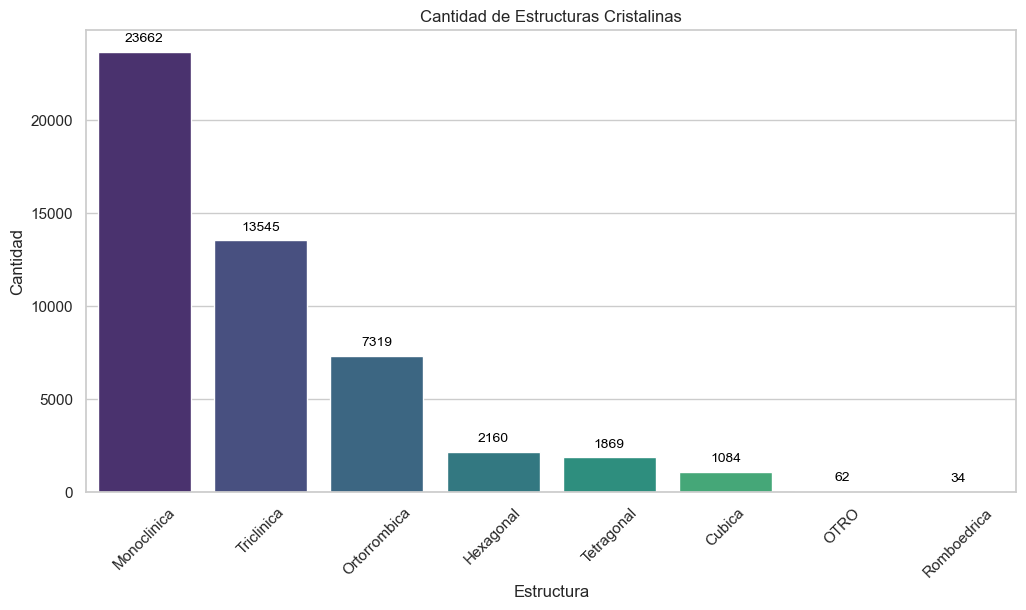

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Gráfico de barras de la cantidad de cada tipo de estructura
plt.figure(figsize=(12, 6))
estructura_counts = crystallography_db['estructura'].value_counts()
bar_plot = sns.barplot(x=estructura_counts.index, y=estructura_counts.values, palette='viridis')

plt.title('Cantidad de Estructuras Cristalinas')
plt.xlabel('Estructura')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

# Agregar etiquetas con los valores del conteo en cada barra
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')
plt.show()